# Question 2

The goal is to see if there are any topic clusters or common sentiments for them. For example,
"The Reaper" and "The Body Snatcher" are death related, "The Hulk" and "The Ninja" are some
supernatural names, "The Ox" and "Crocota" are animal related etc.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset creation

We will use the statistics dataset to create a new dataset that will have the following columns:
- fighter	
- result	
- nickname	
- event_date

In [2]:
stats = pd.read_csv("datasets/stats.csv", sep=";")
stats.head()

,red_fighter_name,blue_fighter_name,event_date,red_fighter_nickname,blue_fighter_nickname,red_fighter_result,blue_fighter_result,method,round,time,...,red_fighter_sig_str_body_pct,blue_fighter_sig_str_body_pct,red_fighter_sig_str_leg_pct,blue_fighter_sig_str_leg_pct,red_fighter_sig_str_distance_pct,blue_fighter_sig_str_distance_pct,red_fighter_sig_str_clinch_pct,blue_fighter_sig_str_clinch_pct,red_fighter_sig_str_ground_pct,blue_fighter_sig_str_ground_pct
0,ILIA TOPURIA,MAX HOLLOWAY,26/10/2024,El Matador,Blessed,W,L,KO/TKO,3,1:34,...,14,16,20,24,94,100,0,0,5,0
1,ROBERT WHITTAKER,KHAMZAT CHIMAEV,26/10/2024,The Reaper,Borz,L,W,Submission,1,3:34,...,0,33,100,0,100,0,0,0,0,100
2,MAGOMED ANKALAEV,ALEKSANDAR RAKIC,26/10/2024,-,Rocket,W,L,Decision - Unanimous,3,5:00,...,40,16,23,64,90,94,9,5,0,0
3,LERONE MURPHY,DAN IGE,26/10/2024,The Miracle,50K,W,L,Decision - Unanimous,3,5:00,...,23,10,7,13,71,69,23,13,5,17
4,SHARA MAGOMEDOV,ARMEN PETROSYAN,26/10/2024,Bullet,Superman,W,L,KO/TKO,2,4:52,...,44,12,18,58,96,97,3,2,0,0


The **fighters** dataframe will be constructed by combining red and blue fighters name, nickname and result.

In [3]:
# transform the stats dataset to have one row per figher 
# - red_fighter_name and blue_fighter_name = fighter
# - red_fighter_result and blue_fighter_result = result
# - red_fighter_nickname and blue_fighter_nickname = nickname
# - keep event_date

fighters = pd.DataFrame()
fighters["fighter"] = pd.concat([stats["red_fighter_name"], stats["blue_fighter_name"]])
fighters["result"] = pd.concat([stats["red_fighter_result"], stats["blue_fighter_result"]])
fighters["nickname"] = pd.concat([stats["red_fighter_nickname"], stats["blue_fighter_nickname"]])
fighters["event_date"] = stats["event_date"].reset_index(drop=True)

fighters.head()

,fighter,result,nickname,event_date
0,ILIA TOPURIA,W,El Matador,26/10/2024
1,ROBERT WHITTAKER,L,The Reaper,26/10/2024
2,MAGOMED ANKALAEV,W,-,26/10/2024
3,LERONE MURPHY,W,The Miracle,26/10/2024
4,SHARA MAGOMEDOV,W,Bullet,26/10/2024


Now we can take only the nicknames. Let's check out some examples.

In [4]:
nicknames = fighters[["fighter", "nickname"]].drop_duplicates()
# show 20 random nicknames
nicknames.sample(20)

,fighter,nickname
22,MELISSA MARTINEZ,Super Mely
3061,CRAIG WHITE,The Thundercat
3966,ROAN CARNEIRO,Jucao
3147,RICHIE SMULLEN,-
286,JALIN TURNER,The Tarantula
1686,CARLOS CONDIT,The Natural Born Killer
432,MARCUS MCGHEE,The Maniac
3088,DANIELLE TAYLOR,Dynamite
773,JOSEPH HOLMES,Uglyman Joe
2939,KEITA NAKAMURA,K-Taro


## NLP Analysis

In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/lucijaaleksic/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lucijaaleksic/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

To preprocess a nickname we will remove any punctuation and stopwords. We will remove both english and spanish stopwords since some fighters have spanish nicknames, e.g. El Matador.

In [6]:
def preprocess_nickname(nickname):
    # remove punctuation
    nickname = nickname.translate(str.maketrans('', '', string.punctuation))
    # remove stopwords
    stop_words_en = set(stopwords.words('english'))
    stop_words_es = set(stopwords.words('spanish'))
    word_tokens = word_tokenize(nickname)
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words_en and not w.lower() in stop_words_es]
    filteres_sentence = " ".join(filtered_sentence)
    return filtered_sentence, word_tokens

clean = []
tokens = []
for nickname in nicknames["nickname"]:
    filtered_sentence, word_tokens = preprocess_nickname(nickname)
    clean.append(" ".join(filtered_sentence))
    tokens.append(word_tokens)
    
nicknames["clean"] = clean
nicknames["tokens"] = tokens

# remove nicknames with no "nickname" after preprocessing
nicknames = nicknames[nicknames["clean"] != ""]

nicknames.head()

,fighter,nickname,clean,tokens
0,ILIA TOPURIA,El Matador,Matador,"[El, Matador]"
1,ROBERT WHITTAKER,The Reaper,Reaper,"[The, Reaper]"
3,LERONE MURPHY,The Miracle,Miracle,"[The, Miracle]"
4,SHARA MAGOMEDOV,Bullet,Bullet,[Bullet]
5,IBO ASLAN,The Last Ottoman,Last Ottoman,"[The, Last, Ottoman]"


### 1. Natural clustering of nicknames

Firstly, let's try to cluster the nicknames using KMeans and TF-IDF Vectorization. Then we can anaylze the clusters and see if there are any common themes.

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from collections import defaultdict

In [8]:
# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = vectorizer.fit_transform(nicknames["clean"])

# KMeans clustering
kmeans = KMeans(n_clusters=7, random_state=42)  # Adjust n_clusters based on your data

In [9]:
nicknames["cluster"] = kmeans.fit_predict(tfidf_matrix)

for cluster in range(kmeans.n_clusters):
    print(f"\nCluster {cluster}:")
    cluster_nicknames = nicknames[nicknames["cluster"] == cluster]["nickname"].values.tolist()
    print(", ".join(cluster_nicknames))

/Users/lucijaaleksic/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Cluster 0:
El Matador, The Reaper, The Miracle, Bullet, The Last Ottoman, Handz of Steel, African Savage, Ferocious, Fluffy, InnerG, White Kong, The Damage, Superman, La Pantera, Super Mely, Raw Dawg, Bang Bang, KGD, D-Rod, JSP, The Answer, The Juggernaut, The Determined, Poatan, Rocky, Fenomeno, Wonderboy, Thud, Cesinha, Superman, Cookie Monster, The Crusher, The Sniper, Jaguar, Air, The Last Pirate, Smile Killer, The Hulk, Mr. Highlight, Double Impact, Fiona, The Zulu Warrior, Suga, T-City, Golden Boy, Lazy Boy, El Loco, Puro Chicali, El Nino Problema, Durinho, Bate Estaca, Mean Machine, Danger, The Midwest Choppa, Lipe Detona, The Killa Gorilla, Overkill, Robzilla, Genghis, The Haitian Sensation, The Golden Boy, The Great, Savage, Slava Claus, The Joker, Stillknocks, Don't Blink, Gamer, Bam Bam, The Leech, Kuya, King, Phar, Kakamora, Tybur, The Leech, LeftHand2God, El Guapo, The Moroccan Devil, Rondinha, Chito, El Cucuy, El Fenomeno, The Professional, The UAE Warrior, Georgian Viki

We can descripe the clusters by looking at the most common words in each cluster.
1. Topics like killing and danger (Violent Bob Ross, The Butcher), titles (Lord, Archangel), animlals some geographical (Felipinho, The Irish Dragon) can be found, this is by far the biggest cluster.
2. This cluster contains names with the word "train" (The Train, Freight Train) or depict something big (Big Rig, Big C, Big Dog).
3. Here we have all related to psychopaths (Psycho, The American Psycho).
4. This cluster has names related to the word "hammer" (The Russian Hammer, The War Hammer)
5. This fifth cluster has names related to the word "gladiator" (The Baltic Gladiator, The Gladiator)
6. Last cluster contains names related to the word "assassin" (The Silent Assassin, The Assassin Baby, The Greek Assassin).


## 2. Predefined topic cluster

Here we'll use a transformer model to embed topics and then find the closest nicknames to each topic.

In [18]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# pretrained model for embedding sentences
model = SentenceTransformer('all-MiniLM-L6-v2')

topics = ["protagonist", "antagonist", # narrative
           "european", "american", "latino", "asian", # geographic
           "animal", "supernatural", "death" # thematic
           ]

topic_embeddings = model.encode(topics)
nickname_embeddings = model.encode(nicknames["clean"].values)

def find_closest_topic(nickname_embedding, topic_embeddings, topics):
    similarities = cosine_similarity([nickname_embedding], topic_embeddings)[0]
    closest_topic_idx = np.argmax(similarities)
    return topics[closest_topic_idx]

nicknames["assigned_topic"] = [
    find_closest_topic(nickname_embedding, topic_embeddings, topics)
    for nickname_embedding in nickname_embeddings
]

for topic in topics:
    print(f"\nTopic: {topic}")
    print(nicknames[nicknames["assigned_topic"] == topic]["nickname"].values)



Topic: protagonist
['El Matador' 'Superman' 'Bang Bang' 'The Juggernaut' 'Wonderboy'
 'Superman' 'The Crusher' 'The Sniper' 'The Last Pirate' 'Mr. Highlight'
 'The Zulu Warrior' 'Golden Boy' 'Lazy Boy' 'The Golden Boy' 'Slava Claus'
 'Bam Bam' 'King' 'Rondinha' 'The Professional' 'Almighty' 'The Prospect'
 'The Welsh Gangster' 'Marretinha' 'Juicy J' 'The Fearless'
 'The Karate Hottie' 'Hillman' 'Mr. Perfect' 'Bam Bam' 'Melk Cauthy'
 'Rudeboy' 'The Fresh Prince' 'Junior' 'Lil Monster' 'Bruce Leeroy'
 'Marreta' 'Lord Kong' 'Magnum' 'The All-American' 'Senor Perfecto' 'Josi'
 'Pastor' 'Blonde Fighter' 'The Young Punisher' 'The Big Boy' 'JoJo'
 'Bigi Boy' 'Pride of Palestine' 'The King' 'The High Chief' 'Nomad'
 'Kung Fu Kid' 'The Carpenter' 'Puna' 'Captain Morocco' 'Ataman' 'Mamba'
 'StarBoy' 'The Last Ninja' 'Blessed' 'Ninja' 'Young Savage' 'The Matrix'
 'The Sniper' 'Bonecrusher' 'Rebel Girl' 'Pretty Boy' 'Superman'
 'The Warrior Princess' 'Remember the Name' 'Uglyman Joe' 'Knightmare'

It can help us to represent clusters with word clouds to gain better insights.

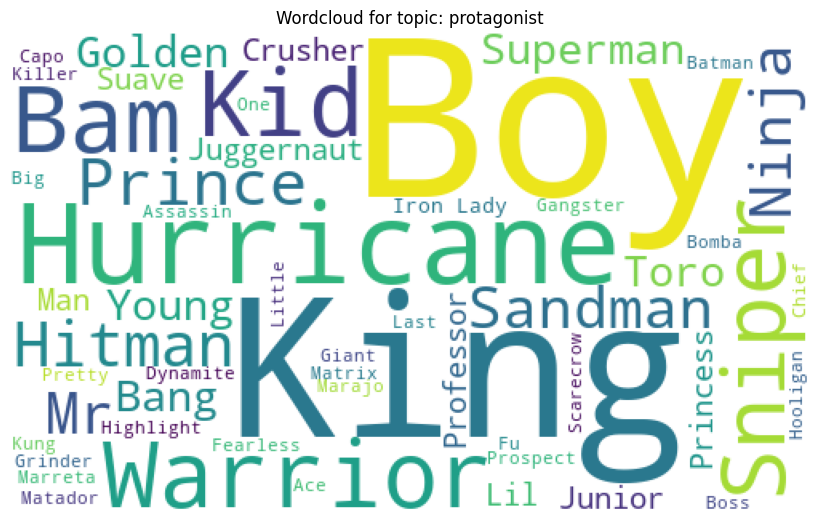

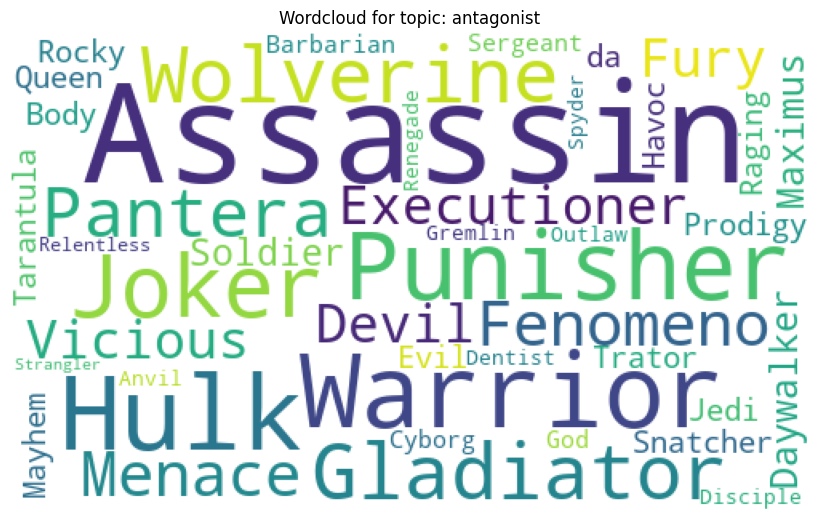

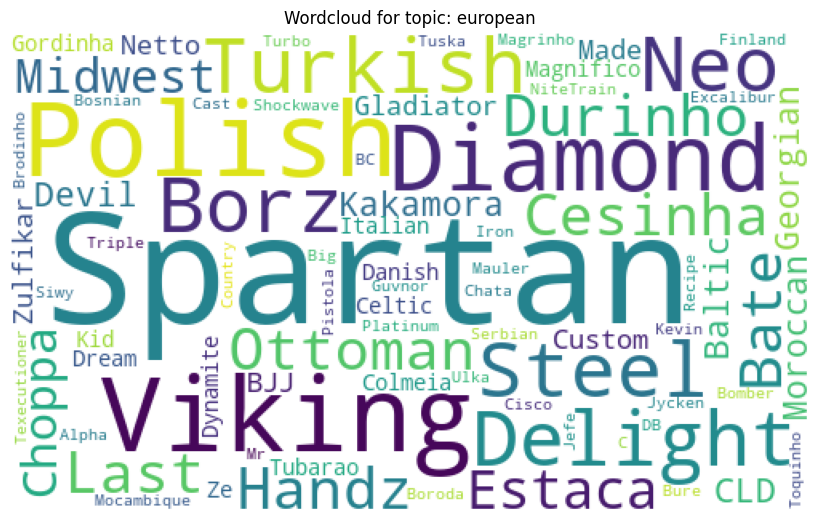

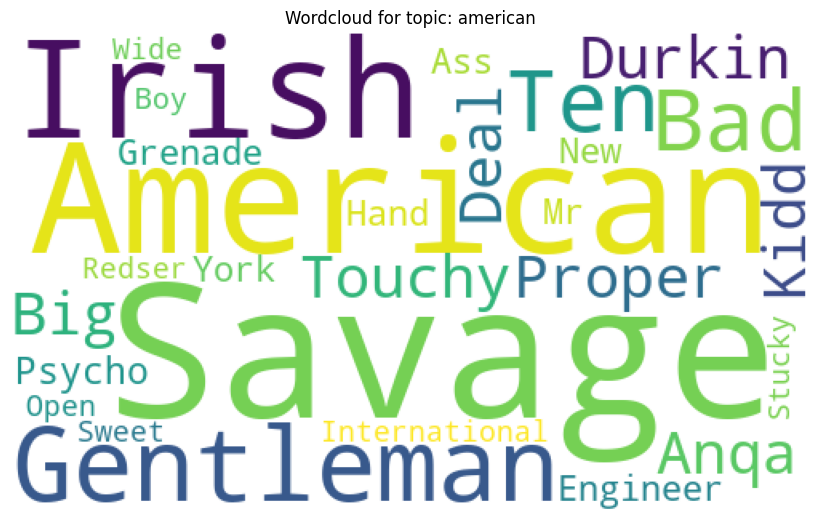

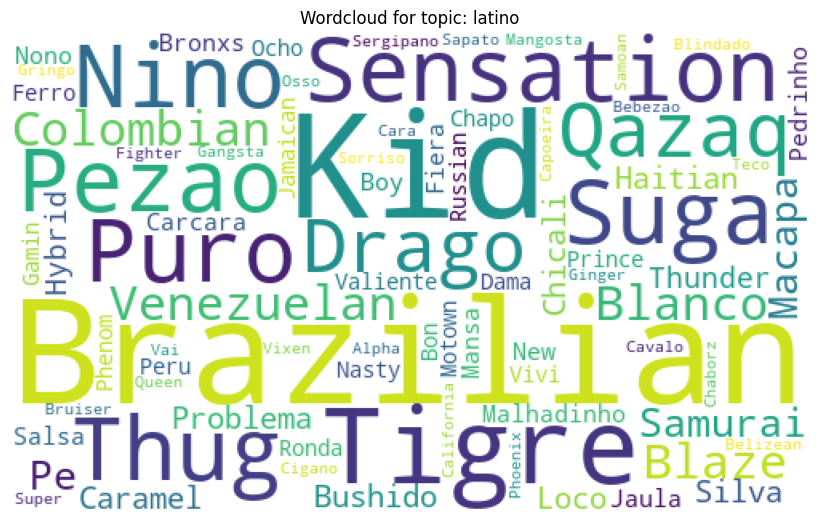

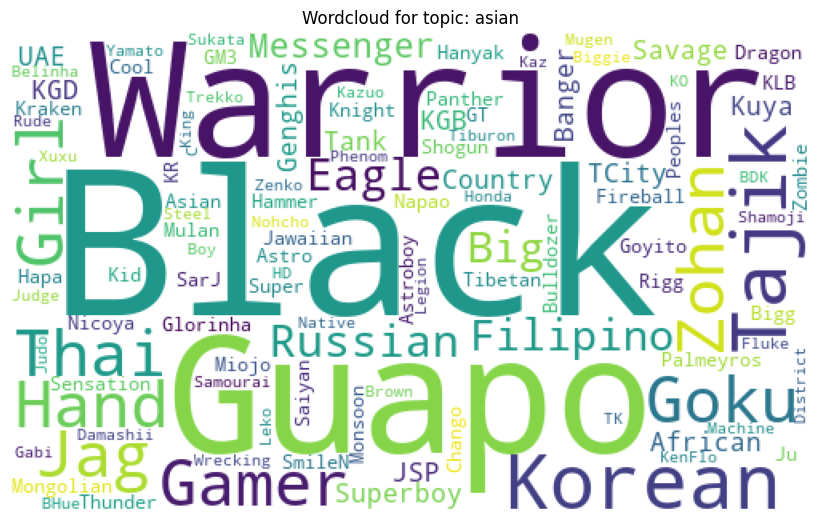

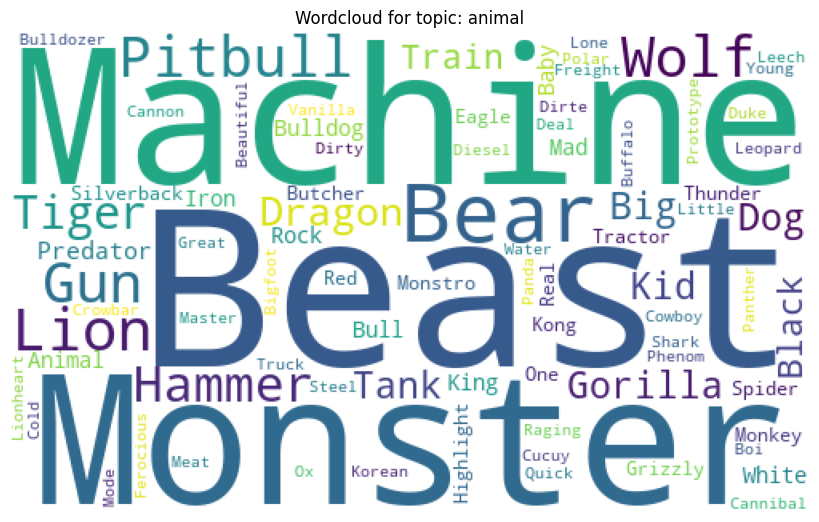

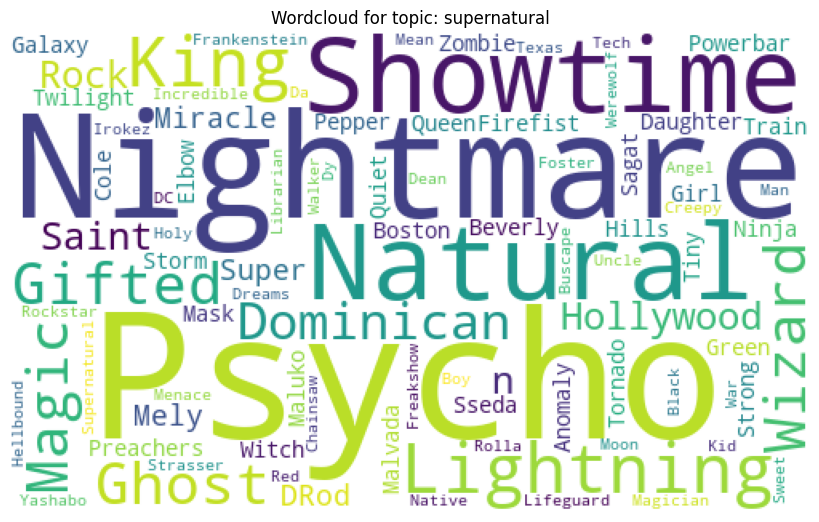

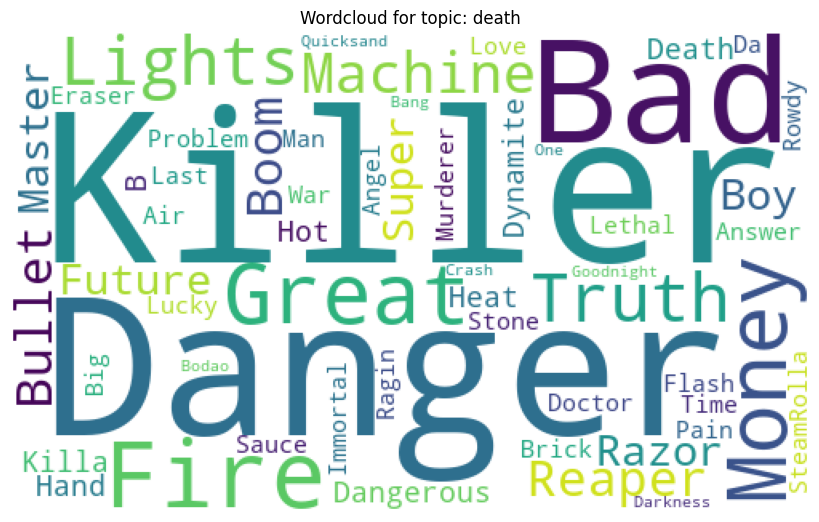

In [19]:
from wordcloud import WordCloud

# visualize wordcloud for each topic
for topic in topics:
    wordcloud = WordCloud(width = 500, height = 300, 
                background_color ='white', 
                stopwords = set(stopwords.words('english')), 
                min_font_size = 10).generate(" ".join(nicknames[nicknames["assigned_topic"] == topic]["clean"]))
    
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(f"Wordcloud for topic: {topic}")
    plt.show()

We can see for the **protagonist** topic words like "kid", "king", "boy" and "warrior" are the most common. 

For the **antagonist** topic words like "assassin", "devil", "punisher" and "executioner" can be found.

In the **european** word cloud the most common is the "spartan" word. Along with "viking", "polish", "turkish". It's interesting that a word like "diamond" is very common in this cluster.

For the **american** word cloud the most common is of course the "american" word. It's weird why the word "Irish" is very represented here and not in the european cluster. The word "savage" and "gentleman" are also here.

In the **latino** cluster we have many spanish and portuguese words alongside with geographical names like "colombian" and "brazilian". There are words "tigre", "nino" and "caramel".

**Asian** cluster has words like "korean", "russian", "thai, as well as some words liek "dragon" or "goku". It's interesting as to why the word "black" is so common here.

The **animal** cluster has words like "beast" which is the most common as well as "pitbull", "tiger", "lion" and "dragon". The word "machine" is here which is weird.

In the **supernatural** cluster we have words "nightmare", "psycho", "ghost" and "wizard".

In the final cluster **death** we have words like "killer", "danger", "bad" and "money".